### Data Preprocessing

In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option ("display.max_columns", None)


In [2]:
df = pd.read_csv("Visadataset.csv")

In [3]:
df.shape

(25480, 12)

## Data Cleaning




- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

## Check Null Values


In [4]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), "% missing values")





In [5]:
features_with_na

[]

- There are no null values in the dataset

## Handling Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate values in the dataset

**Remove case_id from the dataset as it cannot used in Model Training**

In [7]:
df.drop('case_id', inplace=True, axis =1)

### Feature Engineering

In [8]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
# finding the age of the company
from datetime import date

today_date  = date.today()
current_year = today_date.year
current_year

2025

**Subtract current year with year of estab to get company's age**

In [10]:
df['company_age'] = current_year - df['yr_of_estab']

In [11]:
df['company_age']

0         18
1         23
2         17
3        128
4         20
        ... 
25475     17
25476     19
25477    115
25478    138
25479     65
Name: company_age, Length: 25480, dtype: int64

In [12]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [13]:
#drop the yr_of_estab column

df.drop('yr_of_estab',inplace = True, axis =1)

In [14]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


### Types of feature

**Numeric Features**

In [15]:
num_features = [feature for feature in df.columns if df[feature].dtype !="O"]
print("Numerical features : ", len(num_features))



Numerical features :  3



**Categorical Features**


In [16]:
cat_features = [feature for feature in df. columns if df[feature].dtype =="O"]

print("Num of categorical Features: ", len(cat_features))

Num of categorical Features:  8



**Discrete features**


In [17]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [18]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


### Split X and Y

* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**

In [20]:
X = df.drop('case_status', axis=1)

In [23]:
y=df['case_status']

In [24]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

**Manual encoding target column**

In [25]:
# If the target column has denied, it is replaced by  1 and other are 0

y = np.where(y=="Denied", 1,0)

In [26]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(25480,))

## Feature Transformation

#### distribution of data before scaling

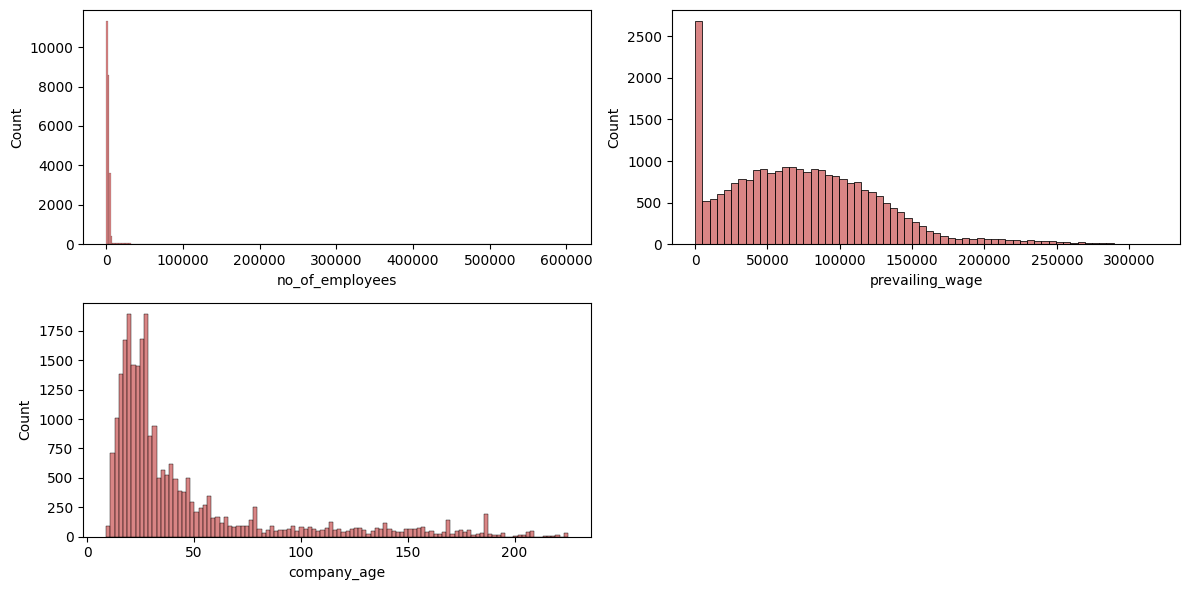

In [27]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Company age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

### Check Skewness

In [28]:
X[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

### Apply Power Transformer to Check if it can reduces the outliers

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = "yeo-johnson")
transform_features = ['no_of_employees', 'company_age']